In [1]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use("/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle")
%config InlineBackend.figure_format = 'svg'
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

In [2]:
from importlib import reload
import PlotTrackOfProcess
reload(PlotTrackOfProcess)
from PlotTrackOfProcess import PlotTrackOfProcess
track_tool = PlotTrackOfProcess()

name_file_template = "root://junoeos01.ihep.ac.cn//eos/juno/user/luoxj/Sim_DSNB/timing_constant_study/neutron_0_0_0_diff_E/detsim/user-root/user-detsim-{}.root"
dir_v_average_dE_dx = {}
dir_v_average_dE_dx_times_with_quench_factor = {}
dir_v_equen = {}
v_Edep_to_plot = range(1,10,2)
# v_Edep_to_plot = [1]
threshold_Equen = 0
for Edep in v_Edep_to_plot:
    track_tool.SetDataset(name_file_template.format(Edep))
    v_equen = track_tool.Get_v_Equen(filter_n_capture=True)
    v_average_dE_dx = track_tool.Get_v_Average_dE_dx()
    v_average_dE_dx_times_with_quench_factor = track_tool.Get_v_Average_dE_dx(times_quench_factor=True)
    index_equen_cut = (v_equen>threshold_Equen)
    dir_v_equen[Edep] = v_equen[index_equen_cut]
    dir_v_average_dE_dx[Edep] = v_average_dE_dx[index_equen_cut]
    dir_v_average_dE_dx_times_with_quench_factor[Edep] = v_average_dE_dx_times_with_quench_factor[index_equen_cut]


  0%|          | 0/10000 [00:00<?, ?it/s]/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/PlotTrackOfProcess.py:344: RuntimeWarning: invalid value encountered in true_divide
  one_track_dE_dx = np.nan_to_num(one_track_dE/one_track_dx)
100%|██████████| 10000/10000 [01:01<00:00, 161.70it/s]


In [3]:
# Check dE_dx with quench factor
# v_equen_check = []
# for i in range(10):
#     (dE_dx,dE, dE_quench)=track_tool.Get_dE_dx_ByLoading_into_dir(entry_source=i, merge_same_pdg=True, return_dE_quench=True)
#     print(dE)
#     print(dE_quench)
#     equen_check = 0
#     for key in dE.keys():
#         equen_check += np.sum(dE_quench[key])
#     v_equen_check.append(equen_check)
# print(dir_v_equen[1])
# print(v_equen_check)


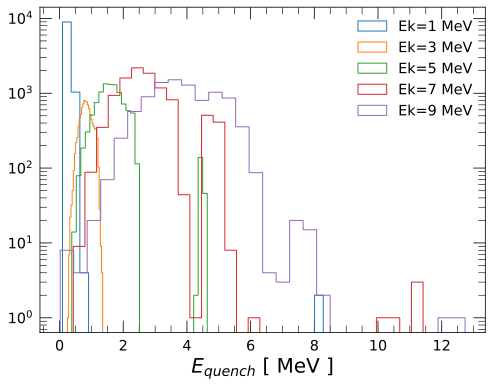

In [4]:
plt.figure()
for Edep in range(1,10,2):
    plt.hist(dir_v_equen[Edep],bins=30, histtype="step",
             label=f"Ek={Edep} MeV")
plt.xlabel("$E_{quench}$ [ MeV ]")
plt.semilogy()
plt.legend()

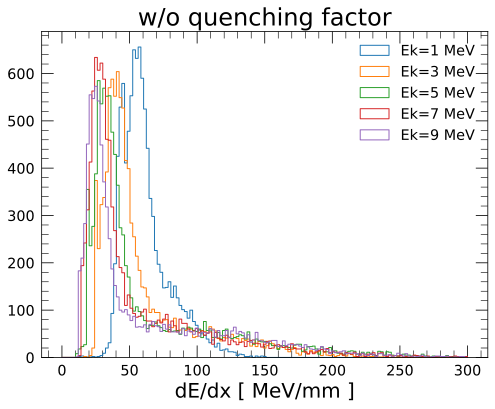

In [5]:
plt.figure()
for Edep in range(1,10,2):
    plt.hist(dir_v_average_dE_dx[Edep],bins=np.linspace(0,300, 150), histtype="step",
             label=f"Ek={Edep} MeV")
plt.xlabel("dE/dx [ MeV/mm ]")
plt.title("w/o quenching factor")
# plt.semilogy()
plt.legend()
plt.savefig("./figure/dE_dx_without_quench_factor_diff_Ek.png")

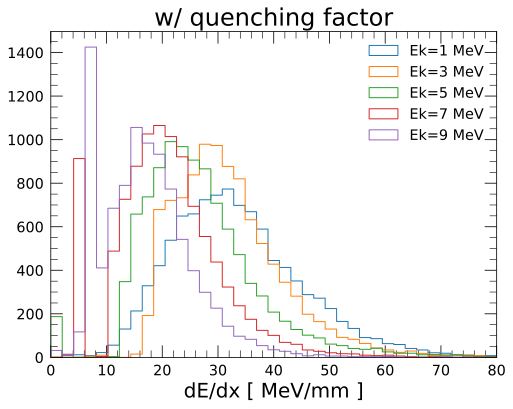

In [6]:
plt.figure()
for Edep in range(1,10,2):
    plt.hist(dir_v_average_dE_dx_times_with_quench_factor[Edep],bins=np.linspace(0,80, 40), histtype="step",
             label=f"Ek={Edep} MeV")
plt.xlabel("dE/dx [ MeV/mm ]")
plt.title("w/ quenching factor")
plt.xlim(0,80)
# plt.semilogy()
plt.legend()
plt.savefig("./figure/dE_dx_with_quench_factor_diff_Ek.png")

In [7]:
print(list(dir_v_equen[9]))

[3.6912003506690425, 3.0128452531238357, 3.278037891366453, 3.3281448598033263, 3.1170653103532016, 3.45693425079674, 5.192071068728824, 3.4716344108985844, 5.254281283789468, 3.5779025356999483, 3.524071790747341, 3.0789612266007027, 4.216576926822613, 3.600262882007648, 4.02380530704844, 4.18096340342097, 5.269317814459146, 5.691096013185859, 3.3644835529895096, 4.058975012805637, 3.2424920228533063, 1.6612611916745654, 2.7942363022809147, 5.142156926137782, 3.845737944053876, 2.8279576054431232, 4.061747063798741, 3.15088774510543, 4.183686447592098, 4.137148110234148, 3.5389880177778696, 4.688390361396137, 3.2484689340443937, 3.704650728637963, 5.402354544145902, 4.390173689094924, 5.430998357665855, 2.7468605048087906, 2.349468587992576, 2.989829576229007, 3.0916682451254323, 2.3407162539620607, 5.014624827528405, 4.805303504991062, 2.7226487997674327, 4.193616285110619, 4.199076315965736, 3.1515335686222596, 4.065039438970812, 4.050872939474727, 2.4949043256862495, 4.945348267142

In [14]:
# Check dE/dx with track information
# from importlib import reload
# import PlotTrackOfProcess
# reload(PlotTrackOfProcess)
# from PlotTrackOfProcess import PlotTrackOfProcess
# track_tool = PlotTrackOfProcess()
# Ek = 9
# threshold_dE_dx = 0
# ceiling_dE_dx = 8
# index_large_dE_dx = np.where( (dir_v_average_dE_dx_times_with_quench_factor[Ek]>threshold_dE_dx)&
#                               (dir_v_average_dE_dx_times_with_quench_factor[Ek]<ceiling_dE_dx))[0]
# track_tool.SetDataset(name_file_template.format(Ek))
# print(index_large_dE_dx)
# print(dir_v_equen[Ek][index_large_dE_dx])
# print(dir_v_average_dE_dx_times_with_quench_factor[Ek][index_large_dE_dx])
# for i in index_large_dE_dx[:5]:
#     track_tool.PlotTrackWithEntrySource(show_p_direction=False,entry_source=i, debug=True, brief_show=True,print_track_info=True,
#                                         show_process_name=True, threshold_track_length=0)
#     track_tool.Print_dE_dx_Contribution(i)


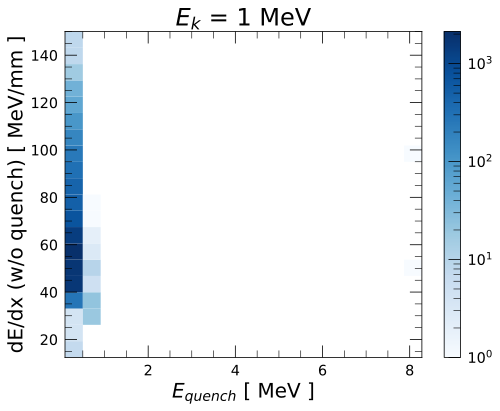

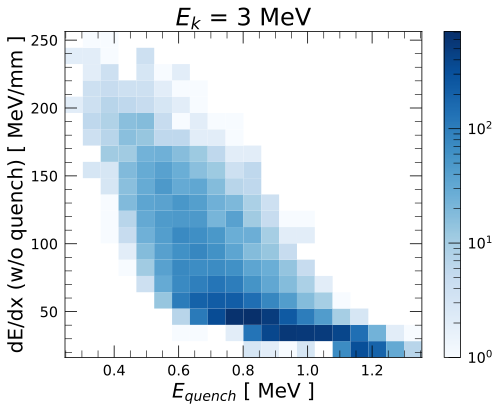

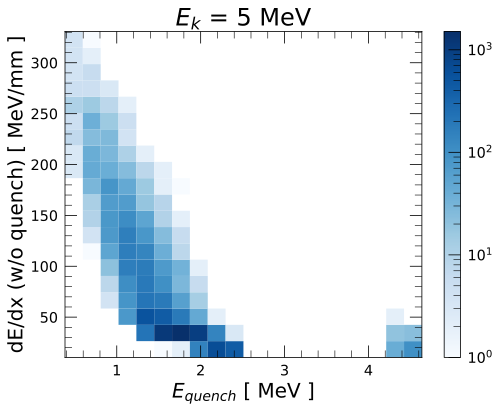

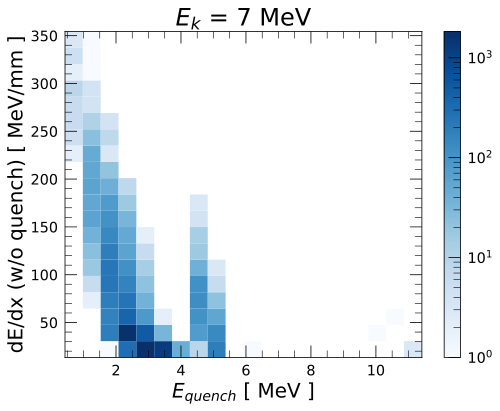

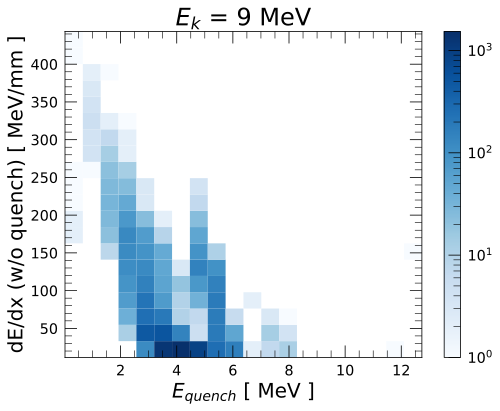

In [9]:
from matplotlib.colors import LogNorm
for Edep in v_Edep_to_plot:
    plt.figure()
    plt.hist2d(dir_v_equen[Edep],dir_v_average_dE_dx[Edep], bins=20, cmap="Blues",
               norm=LogNorm())
    plt.colorbar()
    plt.xlabel("$E_{quench}$ [ MeV ]")
    plt.ylabel("dE/dx (w/o quench) [ MeV/mm ]")
    plt.title("$E_{k}$ = "+f"{Edep} MeV")
    plt.savefig(f"./figure/E_k_{Edep}_2dHist_dE_dx_and_Ek.png")

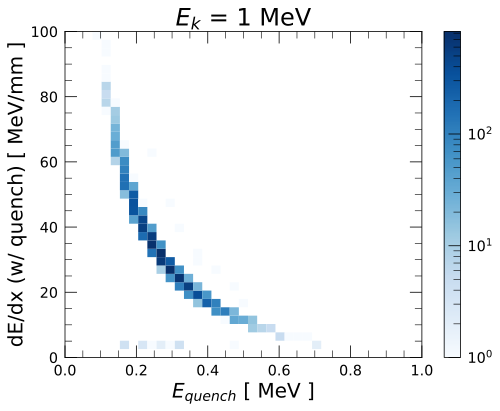

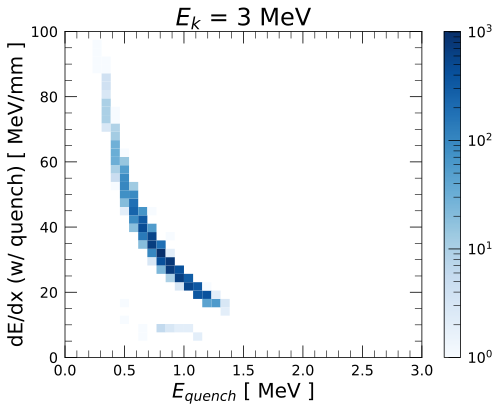

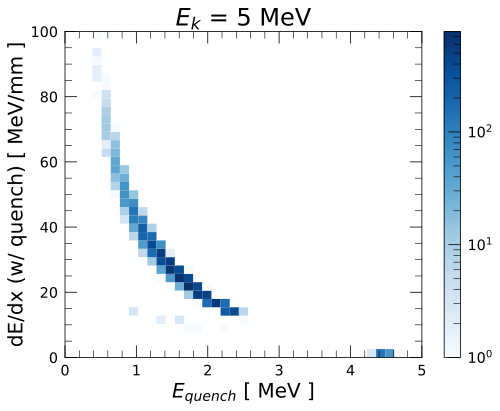

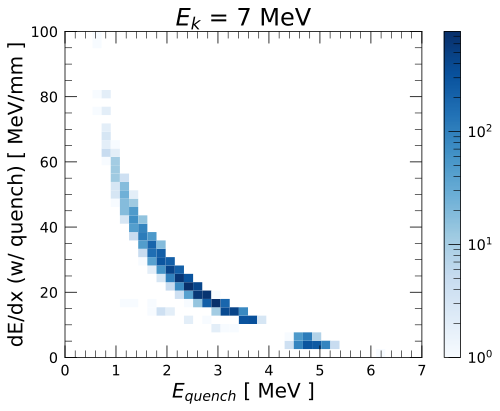

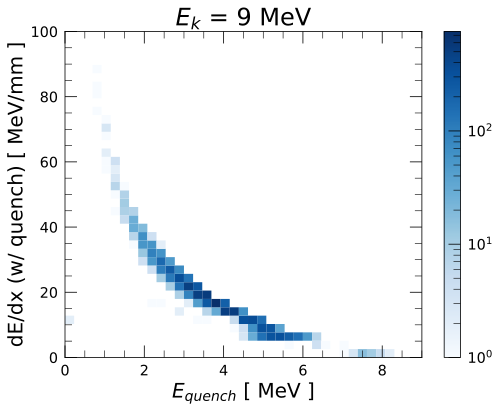

In [18]:
from matplotlib.colors import LogNorm
# y_line_function = 8/x_bins
for Edep in v_Edep_to_plot:
    x_bins = np.linspace(0,Edep,40)
    plt.figure()
    plt.hist2d(dir_v_equen[Edep],dir_v_average_dE_dx_times_with_quench_factor[Edep], cmap="Blues",
               norm=LogNorm(), bins=(x_bins, np.linspace(0,100,40)))
    plt.colorbar()
    plt.xlabel("$E_{quench}$ [ MeV ]")
    plt.ylabel("dE/dx (w/ quench) [ MeV/mm ]")
    plt.title("$E_{k}$ = "+f"{Edep} MeV")
    # plt.plot(x_bins, y_line_function,color="red")
    # plt.xlim(0,0.7)
    # plt.ylim(0,100)
    plt.savefig(f"./figure/E_k_{Edep}_2dHist_dE_dx_with_quench.png")


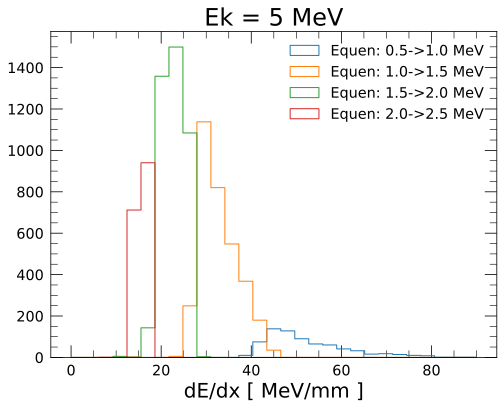

In [29]:
bins_equen = np.linspace(0.5, 2.5, 5)
Edep = 5
v_equen_plot = dir_v_equen[Edep]
v_average_dE_dx_plot = dir_v_average_dE_dx_times_with_quench_factor[Edep]
plt.figure()
for i in range(len(bins_equen)-1):
    index_equen_certain_Ek = (v_equen_plot>bins_equen[i]) & (v_equen_plot<bins_equen[i+1])
    plt.hist(v_average_dE_dx_plot[index_equen_certain_Ek],
             label=f"Equen: {bins_equen[i]:.1f}->{bins_equen[i+1]:.1f} MeV",histtype="step",bins=np.linspace(0,90,30))
plt.legend()
plt.xlabel("dE/dx [ MeV/mm ]")
plt.title(f"Ek = {Edep} MeV")
plt.savefig(f"./figure/Equen_region_dE_dx_Ek_{Edep}.png")

In [11]:
# from importlib import reload
# import PlotTrackOfProcess
# reload(PlotTrackOfProcess)
# from PlotTrackOfProcess import PlotTrackOfProcess
# track_tool.SetDataset(
#     "root://junoeos01.ihep.ac.cn//eos/juno/user/luoxj/Sim_DSNB/timing_constant_study/neutron_0_0_0_uniform_E/detsim/user-root/user-detsim-0.root")
# v_equen = track_tool.Get_v_Equen(filter_n_capture=True)
# v_dE_dx_average = track_tool.Get_v_Average_dE_dx()
#
# print("v_equen:\n",v_equen)
# print("v_dE_dx_average:\t", v_dE_dx_average)
#

In [12]:
# bins_equen = np.linspace(0,10,5)
# bins_hist = np.linspace(0,400,20)
# plt.figure()
# for i in range(len(bins_equen)-1):
#     index_equen_cut = (v_equen<bins_equen[i+1]) & (v_equen>bins_equen[i])
#     plt.hist(v_dE_dx_average[index_equen_cut], bins=bins_hist,histtype="step",
#              density=True,label=f"{bins_equen[i]:.1f} < "+"$E_{quench}$"+f" < {bins_equen[i+1]:.1f} MeV")
# # plt.semilogy()
# plt.xlabel("Average dE/dx [ MeV/mm ]")
# plt.title("dE/dx in Certain Equen Range")
# plt.legend()
# plt.savefig("./figure/dE_dx_in_Certain_Equen_range.png")

In [13]:
# np.histogramdd()
samples = [[1,2,3],[2,4,5], [5,3,6]]
plt.histogramdd(samples, bins=(3,3,3))

(array([[[0., 0., 1.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [1., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 1.]]]),
 [array([1.        , 1.66666667, 2.33333333, 3.        ]),
  array([2., 3., 4., 5.]),
  array([3., 4., 5., 6.])])